<a href="https://colab.research.google.com/github/PPProsenjit/Constructor-in-c-/blob/main/17182103109_Lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import array


In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [3]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [5]:
X.shape

(6, 3)

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

Building LSTM model

In [8]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)



Epoch 1/300
1/1 [==============================] - 5s 5s/step - loss: 32719.3809
Epoch 2/300
1/1 [==============================] - 0s 22ms/step - loss: 32403.4609
Epoch 3/300
1/1 [==============================] - 0s 22ms/step - loss: 32108.8047
Epoch 4/300
1/1 [==============================] - 0s 23ms/step - loss: 31853.7891
Epoch 5/300
1/1 [==============================] - 0s 27ms/step - loss: 31639.2500
Epoch 6/300
1/1 [==============================] - 0s 25ms/step - loss: 31461.5000
Epoch 7/300
1/1 [==============================] - 0s 20ms/step - loss: 31312.1270
Epoch 8/300
1/1 [==============================] - 0s 33ms/step - loss: 31178.3809
Epoch 9/300
1/1 [==============================] - 0s 35ms/step - loss: 31054.9551
Epoch 10/300
1/1 [==============================] - 0s 30ms/step - loss: 30934.5723
Epoch 11/300
1/1 [==============================] - 0s 25ms/step - loss: 30811.1719
Epoch 12/300
1/1 [==============================] - 0s 29ms/step - loss: 30678.7559
Epo

Predicting For the next 10 data

In [10]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[226.28285]
1 day input [196.         210.         226.28285217]
1 day output [[237.69696]]
2 day input [210.         226.28285217 237.69696045]
2 day output [[253.29251]]
3 day input [226.28285 237.69696 253.29251]
3 day output [[269.68628]]
4 day input [237.69696 253.29251 269.68628]
4 day output [[284.0879]]
5 day input [253.29251 269.68628 284.0879 ]
5 day output [[301.58066]]
6 day input [269.68628 284.0879  301.58066]
6 day output [[319.5056]]
7 day input [284.0879  301.58066 319.5056 ]
7 day output [[337.20862]]
8 day input [301.58066 319.5056  337.20862]
8 day output [[357.19965]]
9 day input [319.5056  337.20862 357.19965]
9 day output [[377.81473]]
[226.28285, 237.69696, 253.29251, 269.68628, 284.0879, 301.58066, 319.5056, 337.20862, 357.19965, 377.81473]


In [11]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [12]:
len(timeseries_data)

9

In [13]:
lst_output

[226.28285,
 237.69696,
 253.29251,
 269.68628,
 284.0879,
 301.58066,
 319.5056,
 337.20862,
 357.19965,
 377.81473]

Visualization of the output

In [14]:
import matplotlib.pyplot as plt

In [15]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

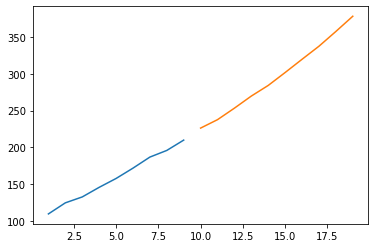

In [16]:


plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)

